In [2]:
import pandas as pd

file_path = r'C:\Users\sharm\Downloads\DS-Assignment Dataset and instructions\DS-Assignment Dataset and instructions\P3- Churn-Modelling Data.xlsx'

df_raw_churn_data = pd.read_excel(file_path)

print(df_raw_churn_data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  churned  
0        101348.88        1  
1        112542.58        0  
2        113931.57        1  
3         93826.63        0  
4       

,Gender,count,percentage
0,Female,4543,45.43
1,Male,5457,54.57


<AxesSubplot:ylabel='percentage'>

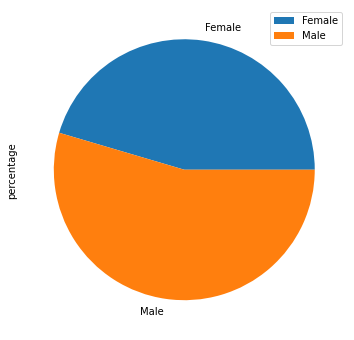

In [5]:
df_gender_distribution = (df_raw_churn_data
                   .groupby(['Gender'])['Tenure'].count().reset_index()
                   .rename(columns={'Tenure':'count'})
                   .assign(percentage=lambda _df: 100*_df['count']/_df['count'].sum()))
display(df_gender_distribution)
df_gender_distribution.set_index(['Gender']).plot.pie(y='percentage', figsize=(6, 6))

,binned,count,percentage
0,"(0, 20]",89,0.890178
1,"(20, 25]",522,5.221044
2,"(25, 30]",1357,13.572715
3,"(30, 40]",4451,44.518904
4,"(40, 50]",2320,23.204641
5,"(50, 60]",797,7.971594
6,"(60, 90]",462,4.620924


<AxesSubplot:ylabel='percentage'>

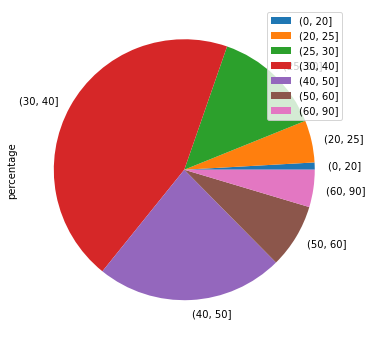

In [6]:
bins = [0, 20, 25, 30, 40, 50, 60, 90]
df_age_distribution = (df_raw_churn_data
                       .assign(binned=lambda _df: pd.cut(_df['Age'], bins))
                       .groupby(['binned'])['Age'].count().reset_index()
                       .rename(columns={'Age':'count'})
                       .assign(percentage=lambda _df: 100*_df['count']/_df['count'].sum()))
display(df_age_distribution)
df_age_distribution.set_index(['binned']).plot.pie(y='percentage', figsize=(6, 6))

<AxesSubplot:xlabel='Age', ylabel='Probability'>

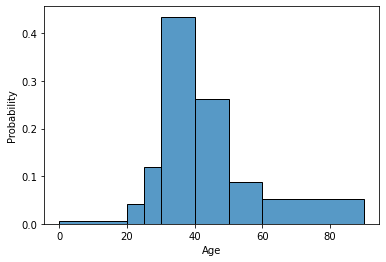

In [13]:
import seaborn as sns

sns.histplot(data=df_raw_churn_data, x='Age', bins=bins, stat='probability')

In [28]:
df_raw_churn_data.query('churned == 1')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,15672754,Burbidge,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,9983,15768163,Griffin,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


,churned,count,percentage
0,0,7963,79.63
1,1,2037,20.37


<AxesSubplot:ylabel='percentage'>

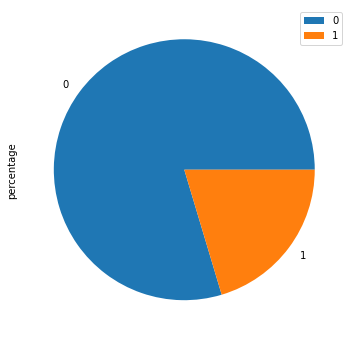

In [16]:
df_churned = (df_raw_churn_data
                   .groupby(['churned'])['Tenure'].count().reset_index()
                   .rename(columns={'Tenure':'count'})
                   .assign(percentage=lambda _df: 100*_df['count']/_df['count'].sum()))
display(df_churned)
df_churned.set_index(['churned']).plot.pie(y='percentage', figsize=(6, 6))

In [21]:
df_raw_churn_data.groupby(['churned'])[['Tenure']].mean()

,Tenure
churned,
0,5.033279
1,4.932744


In [22]:
df_raw_churn_data.groupby(['churned'])[['CreditScore']].mean()

,CreditScore
churned,
0,651.853196
1,645.351497


In [24]:
df_raw_churn_data.groupby(['churned'])[['NumOfProducts']].mean()

,NumOfProducts
churned,
0,1.544267
1,1.475209


In [25]:
df_raw_churn_data.groupby(['churned'])[['Balance']].mean()

,Balance
churned,
0,72745.296779
1,91108.539337


In [26]:
(df_raw_churn_data
 .groupby(['Geography', 'churned'])[['Age']]
 .count().reset_index()
 .rename(columns={'Age': 'count'})
 .assign(percentage=lambda _df: 100*_df['count']/_df.groupby(['Geography'])['count'].transform('sum')))

,Geography,churned,count,percentage
0,France,0,4204,83.845233
1,France,1,810,16.154767
2,Germany,0,1695,67.556796
3,Germany,1,814,32.443204
4,Spain,0,2064,83.326605
5,Spain,1,413,16.673395


In [27]:
(df_raw_churn_data
 .groupby(['Gender', 'churned'])[['Age']]
 .count().reset_index()
 .rename(columns={'Age': 'count'})
 .assign(percentage=lambda _df: 100*_df['count']/_df.groupby(['Gender'])['count'].transform('sum')))

,Gender,churned,count,percentage
0,Female,0,3404,74.928461
1,Female,1,1139,25.071539
2,Male,0,4559,83.544072
3,Male,1,898,16.455928


In [31]:
data = df_raw_churn_data
churn_percentage = data['churned'].mean() * 100

#we'll analyze factors for customer churn
# Here we'll analyze some possible factors
churn_by_geography = data[data['churned'] == 1]['Geography'].value_counts(normalize=True) * 100
churn_by_gender = data[data['churned'] == 1]['Gender'].value_counts(normalize=True) * 100

print("\nChurn Percentage: {:.2f}%".format(churn_percentage))
print("\nChurn by Geography:\n", churn_by_geography)
print("\nChurn by Gender:\n", churn_by_gender)

# Additional patterns (e.g., age, balance, credit score)
churn_by_age_group = data[data['churned'] == 1]['Age'].value_counts(normalize=True) * 100
churn_by_balance = data[data['churned'] == 1]['Balance'].mean()
churn_by_credit_score = data[data['churned'] == 1]['CreditScore'].mean()

print("\nChurn by Age Group:\n", churn_by_age_group)
print("\nAverage Balance of Churned Customers: {:.2f}".format(churn_by_balance))
print("\nAverage Credit Score of Churned Customers: {:.2f}".format(churn_by_credit_score))


Churn Percentage: 20.37%

Churn by Geography:
 Germany    39.960727
France     39.764359
Spain      20.274914
Name: Geography, dtype: float64

Churn by Gender:
 Female    55.915562
Male      44.084438
Name: Gender, dtype: float64

Churn by Age Group:
 46    4.467354
40    4.369170
43    4.320079
45    4.270987
48    3.927344
42    3.780069
47    3.780069
49    3.681885
44    3.583702
39    3.534610
50    3.485518
41    3.387334
51    3.240059
52    3.141875
38    3.092784
37    3.043692
35    2.798233
36    2.601865
54    2.503682
56    2.454590
55    2.356406
33    2.160039
53    1.963672
57    1.865488
34    1.620029
31    1.620029
60    1.570938
32    1.570938
59    1.472754
58    1.423662
29    1.374570
30    1.178203
28    1.129111
62    1.030928
61    1.030928
63    0.883652
24    0.687285
26    0.687285
27    0.638193
64    0.589102
22    0.589102
65    0.392734
71    0.343643
66    0.343643
68    0.294551
23    0.294551
25    0.294551
67    0.245459
70    0.196367
21    0.1472

In [32]:
# Most commonly used products or services
product_usage = data['NumOfProducts'].value_counts()

# Usage patterns by customer segments (e.g., by geography or gender)
usage_by_geography = data.groupby('Geography')['NumOfProducts'].mean()
usage_by_gender = data.groupby('Gender')['NumOfProducts'].mean()

print("\nProduct Usage:\n", product_usage)
print("\nUsage by Geography:\n", usage_by_geography)
print("\nUsage by Gender:\n", usage_by_gender)


Product Usage:
 1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Usage by Geography:
 Geography
France     1.530913
Germany    1.519729
Spain      1.539362
Name: NumOfProducts, dtype: float64

Usage by Gender:
 Gender
Female    1.544134
Male      1.518600
Name: NumOfProducts, dtype: float64


In [33]:
# Average account balance
average_balance = data['Balance'].mean()

# Financial characteristics of churned vs. non-churned customers
balance_churned = data[data['churned'] == 1]['Balance'].mean()
balance_non_churned = data[data['churned'] == 0]['Balance'].mean()

print("\nAverage Account Balance: {:.2f}".format(average_balance))
print("\nAverage Balance of Churned Customers: {:.2f}".format(balance_churned))
print("\nAverage Balance of Non-Churned Customers: {:.2f}".format(balance_non_churned))


Average Account Balance: 76485.89

Average Balance of Churned Customers: 91108.54

Average Balance of Non-Churned Customers: 72745.30
